In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
from io import StringIO
from statistics import *
import subprocess


# Esperienza 1: Termometria e calorimetria
**Data**: 21 Ottobre 2019 
**Gruppo**: (V) Ivan Ingrosso , Antonio Gonzalez, Pietro Garofalo


[Click here](#1.2-Calcolo-calore-specifico)

## Materiale

|Strumenti| Divisione| Portata |
|---------:|:-----------------|:-------------|
|2 Termometri a mercurio    |$0.2^\circ C$    | $100^\circ C$ |
|Bilancia | $0.1 g$ | -- |
|Calorimetri| -- | $1 l$ |
|Cronometro | $0.01 s$ | |

## 1.1 Costante di tempo del termometro

### Relazioni di base per il processo ideale
La relazione che lega la risposta del termometro al tempo è data dalla seguente formula:
$$T(t)=T_{f}+(T_{amb}-T_{f} )e ^{-\frac{t}{\tau}}$$
dove:
- $T(t)$ rappresenta la temperatura mostrata sul termometro all'istante di tempo $t$;
- $T_{amb}$ rappresenta la temperatura riportata sul termometro prima che questo venga inserito nel bagno di acqua cala, ovvero la temperatura al tempo $t=0$;
- $T_{f}$ rappresenta la temperatura dell'acqua calda;
- $\tau$ rappresenta la costante di tempo del termometro che vogliamo stimare; 

### Procedimento di misura
1. Nel primo calorimetro versiamo una quantità di acqua alla temperatura di $\sim 54^\circ C$, che rappresenta la nostra $T_{f}$; nel secondo una quantità di acqua a temperatura ambiente;
2. Immergiamo il termometro nel bagno di acqua a temperatura ambiente e aspettiamo che termalizzi con l'acqua stessa; a termalizzazione avvenuta registriamo la temperatura segnata dal termometro come $T_{amb}$
3. Immergiamo il termometro nel calorimetro con l'acqua calda e registriamo la temperatura segnta ad intervalli di tempo fissati \($0.5s$\); la strategia adottata per realizzare queste misure è stata filmare con uno smartphone il termometro e il cronometro uno vicino all'altro, in modo tale che fossero ben visibili sia le misure del tempo che quelle delle temperature. Dal momento che abbiamo ripetuto l'esperimento due volte, realizzando due video differenti, riportiamo l'analisi dati di entrambi, combinando le stime ottenute attraverso una media pesata.  

### Dati
 
`t`: tempo \[s\]  
`T`: temperatura \[$^\circ C$ \]    
`DT`: risoluzione del termometro (distanza tra due tacche) \[$^\circ C$ \]   
`sT`: incertezza (deviazione standard) su T \[ $^\circ C$ \]

Eseguiamo un fit esponenziale sui dati, attraverso la funzione curve_fit della libreria scipy. Curve_fit riceve in ingresso una funzione (che, in questo caso restituisce un esponenziale), un vettore contente gli istanti di tempo ad intervalli di $0.5s$ \(asse $x$\), un vettore contenente le temperature registrate \(asse $y$\), e un vettore con lo stesso numero di elementi dei vettori precedenti e contente l'incertezza associata a ogni misura di temperatura. Assumendo una distribuizione uniforme nell'intervallo delle divisioni stimiaimo tale incertezza come $\frac{DT}{\sqrt{12}}$. L'ultimo parametro di curve_fit viene dichiarato TRUE in modo da calcolare le incertezze assolute. Curve_fit, oltre a restituire un vettore con i valori dei parametri stimati \(tra i quali a noi, in questa circostanza interessa solo $\tau$\), fornisce anche la matrice di covarianza tra i parametri stessi, dalla quale possiamo ricavare la varianza, e quindi la deviazione standard, di $\tau$. Tale varianza rappresenta la varianza del parametro ottenuto da un fit su dati sintetici, ovvero dati costruiti prendendo la variabile T sulla curva di best fit e aggiuggendole una variabile gaussiana \(Come calcolare l'incertezza generando dati sintetici sarà oggetto di una sezione del paragrafo successivo, per cui, sull'argomento, rimandiamo a 1.2 Calcolo calore specifico.\)

#### Video 1, 1s

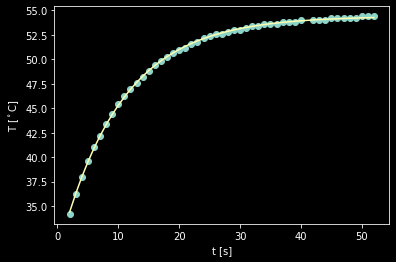

In [7]:
s = open("Datos12.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov12 = curve_fit(fit_func, t, T, sigma=dS, absolute_sigma=True)
tau12, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau12, T0, DeltaT))
xlabel("t [s]")
ylabel("T [$^\circ$C]")
plt.show()

In [8]:
print("Parametro stimato per tau, con incertezza: %lf %lf" %(tau12, np.sqrt(pcov12[0,0])))
print("tau = %.2f +/- %.2f s" % (tau12, sqrt(pcov12[0,0])))

Parametro stimato per tau, con incertezza: 10.152235 0.037992
tau = 10.15 +/- 0.04 s


Analizzando i residui si può notare che gli scarti sono contenuti in un intervallo che è maggiore di quello che ci si aspetterebbe in base ai calcoli realizzati dal best fit. Inoltre, l'andamento di tali scarti non sembra puramente casuale, come invece dovrebbe essere se il modello utilizzato per interpolare i dati fosse corretto. Da questo osserviamo che, con buona probabilità, l'andamento della temperatura è più complicato di un esponenziale, motivo per cui i dati sperimentali si discostano dalla funzione teorica con un errore che è, evidentemente, non casuale. 

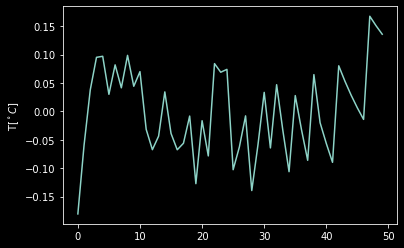

In [9]:
Tfit = fit_func(t, tau12, T0, DeltaT)
res = T-Tfit
plot(res);
ylabel("T[$^\circ C$]");

#### Video 2, 1 s

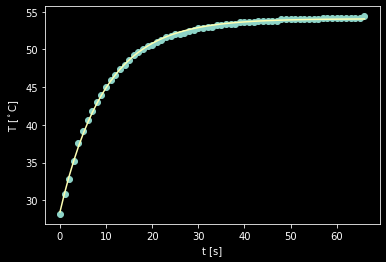

In [10]:
s = open("Datos22.txt").read().replace(",", ".")
t,T = transpose(loadtxt(StringIO(s)))
DT= 0.2
dS=DT/sqrt(12)*np.ones_like(T)
def fit_func(t, tau,TF ,DeltaT):
    return TF - DeltaT*exp(-t/tau)
params,pcov22 = curve_fit(fit_func, t, T,sigma=dS, absolute_sigma=True)
tau22, T0, DeltaT = params
plot(t, T, "o")
plot(t, fit_func(t, tau22, T0, DeltaT))
xlabel("t [s]")
ylabel("T [$^\circ$C]")
plt.show()

In [11]:
print("Parametro stimato per tau, con incertezza: %lf, %lf" %(tau22, np.sqrt(pcov22[0,0])))
print("tau = %.2f +/- %.2f s" % (tau22, sqrt(pcov22[0,0])))

Parametro stimato per tau, con incertezza: 9.705420, 0.024353
tau = 9.71 +/- 0.02 s


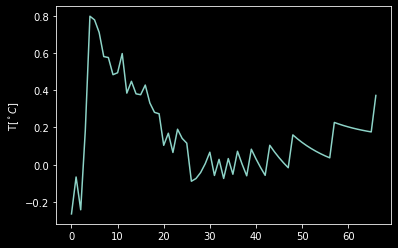

In [12]:
Tfit = fit_func(t, tau12, T0, DeltaT)
res = T-Tfit
plot(res);
ylabel("T[$^\circ C$]");

Combiniamo le due stime di $\tau$ in un'unica stima attraverso la media pesata di tali stime con le incertezze come pesi:

In [13]:
N2 = tau12/pcov12[0,0]+tau22/pcov22[0,0]
D2=1/pcov12[0,0]+1/pcov22[0,0]
P2=1/sqrt(D2)
print("tau = %.2f +/- %.2f s" % (N2/D2,P2 ))
#####Tau  videos a 1.0s######

tau = 9.84 +/- 0.02 s


### Verifica dei risultati del fit attraverso la legge di raffreddamento di Newton
E' possibile calcolare analiticamente il valore di $\tau$ attraverso la legge di raffreddamento di Newton $$ \tau=\frac{C}{hA}$$ dove 
- C é la capacitá termica del mercurio, che possiamo calolare attraverso il calore specifico e la massa, il primo noto, la seconda ricavata dalla relazione $v\rho = m$, dove $\rho $ è la densità del mercurio.  Assumendo una forma cilindrica per il bulbo, chiamando $l$ l'altezza e $d$ il diametro, si ottiene che $$ C=cv\rho$$
- h é il coefficiente di convezione in acqua statica;
- A é la superficie del bulbo. 

Il seguente codice, a partire dai valori dati delle variabili interessate, calcola il valore di $\tau$ attraverso la legge di raffreddamento di Newton.

#### Dati 
`c`: Capacità termica del mercurio \[$\frac{J}{Kg K}$\];  
`rho`: Densità del merucrio \[$\frac{Kg}{m^3} $ \];  
`l`: altezza del bulbo \[$m$\];  
`d`: diametro del bulco \[$m$\], per cui `r` sarà il raggio;  
`h`: coefficiente di convezione in acqua statica \[$\frac{W}{m^2 K} $\]

In [14]:
c = 140
rho = 1.3e4
l = 0.011
r = 0.003
h = 750
tau = c*r**2*np.pi*l*rho/(h*2*r*np.pi*l)
print("tau = %.1f s " % (tau))

tau = 3.6 s 


### Conclusioni
|$\tau$ stimato \[s\]  | $\tau $ analitico \[s\]|
|:--------------------:|:----------------------:|  
|9.83 $\pm$ 0.02       |3.6                     |  

Confrontando i valori ottenuti dalle misure con il valore di $\tau$ calcolato analiticamente notiamo che questi valori sono decisamente poco consistenti. Alla luce di questa inconsistenza ipotiziamo che il termometro con il quale abbiamo effettuato le misure non sia un termometro a mercurio. 

## 1.2 Calcolo calore specifico

### Relazione di base
Si considerino due sistemi termodinamici, un costituito da un solido, con temperatura $T_{s}$ e di massa $m_{m}$, e uno costituito da un recipiente chiuso e dotato di pareti adiabatiche, riempito con acqua a temperatura $T_{a}$ e massa $M_{a}$. Inserendo il sistema solido nell'acqua e misurando la temperatura con un termometro, si osserva una variazione del valore di questa grandezza che si porta ad un livello $T_{e}$ intermedio tra la tempretura dell'acqua e la temperatura del solido. Come conseguenza di tale variazione cambierà anche il valore della funzione di stato energia interna dei due sistemi, costituenti un sistema unico dopo il mescolamento. Nello specifico, definendo $\Delta U_{s}$ e $\Delta U_{a}$ le variazioni di energia interna del sistema solido e dell'acqua, per il primo principio della termodinamica si avrà 


- **Sistema Solido** $\Delta U_{s} = Q_{s} - L_{s}$  
- **Acqua** $\Delta U_{a} = Q_{a} - L_{a}$    
- **Solido $+$ acqua** $ \Delta U = \Delta U_{s} + \Delta U_{a} = (Q_{s} + Q_{a}) - (L_{s} + L_{a}) = 0$  
Essendo rigide le pareti del sistema, non viene compiuto lavoro e $$(L_{s} + L_{a}) = 0 $$  per cui $$ (Q_{s} = - Q_{a})$$  

Definendo
- $c_{m}$ il calore specifico del materiale ;
- $c{a}$ il calore specifico dell'acqua;  
si può riscrivere la precedente formula come $$  m_{m}c_{m}(T_{e} - T_{s}) = M_{a}c_{a}(T_{a} - T_{e})$$
In realtà, poichè il calorimetro non partecipa in egual misura alla trasformazione, si introduce una grandezza $M^*$, detta massa equivalente del calorimetro, il cui valore è $25 \pm 5 g$ (Per una discussione circa questa grandezza, si veda [Verifica dell'equivalente in acqua del calorimetro](# Verifica dell'equivalente in acqua del calorimetro); La formula utilizzata per la stima del calore specifico è dunque 

$$ c_{m} = c_{a} \frac{(M^* + M_{a})(T_{a}-T_{e})}{m_{m}(T_{e}-T_{m})}$$ 
 
### Procedimento di misura
- Selezionato uno dei materiali proposti, ne è stata misurata la massa;
- Il materiale selezionao è stato inserito in un bagno di acqua a temperatura ambiente. Successivamente ne è stata registrata la temperatura di equilibrio a termalizzazione avvenuta;
- E' stato preparato un bagno di acqua calda all'interno del calorimetro delle mescolanze, e dopo averne registrato la temperatura è stato immerso il materiale all'interno del calorimetro;
- A termalizzazione avvenuta, è stata registrata la temperatura di equilobrio.  
Durante la misura l'apertura del calorimetro è stata tenuta chiusa con un tappo per ridurre la dispersione di calore con l'ambiente.  
Questa sequenza di operazioni è stata ripetuta una volta per ciascun materiale. 

### Dati
`ca` Calore specifico dell'acqua \($\frac{cal}{g ^\circ C}$\)  
`Ma` Massa di acqua calda versata  nel calorimetro \($g$ \)  
`DMa` Incertezza associata alla misura \($g$ \)  
`Mm` Massa materiale \($g$\)  
`DMm` Incertezza associata alla misura \($g$\)  
`Meq` Equivalente in acqua delcalorimetro \($g$\)  
`DMeq` Incertezza associata alla misura \($g$\)  
`Ta` Temperatura dell'acqua calda \($ ^\circ C$ \)  
`DTa` Incertezza associata alla misura \($ ^\circ C$ \)  
`Tm` Temperatura all'equilibrio \($ ^\circ C$ \)  
`DTm` Incertezza associata alla misura \($ ^\circ C$ \)  
`Teq` Temperatura all'equilibrio \($ ^\circ C$ \)  
`DTeq` Incertezza associata alla misura \($ ^\circ C$ \)  

Per la stima delle incertezze sulle misure è stato preso l'errore casuale dovuto alla risoluzione finita dello strumento. Tale incertezza viene valutata come $$ \frac{I_{s}}{\sqrt{12}}$$ dove $I_{s}$ rappresenta l'intervallo delle divisioni o della risoluzione dello strumento.  
Le variabili utilizzate nel seguente codice sono degli array di tre elementi ciascuno, il primo dei quali contiene le misure del materiale 1, il secondo quelle del materiale 2, il terzo quelle del materiale 3. 

In [27]:
Ma = np.array([202., 202.8, 200.7])
DMa = 0.1/np.sqrt(12)*np.ones_like(Ma)
Mm = np.array([79., 73.1, 194.4])
DMm = 0.1/np.sqrt(12)*np.ones_like(Mm)
Meq = 25. 
DMeq = 5.
Ta = np.array([42.2, 40.8, 39.6])
DTa = 0.2/np.sqrt(12)*np.ones_like(Ta)
Tm = 28.2*np.ones_like(Ta)
DTm = 0.2/np.sqrt(12)*np.ones_like(Tm)
Teq = np.array([40.8, 39., 38.2])
DTeq = 0.2/np.sqrt(12)*np.ones_like(Teq)
print("Solido n°    Ma +/- DMa [g]: ")
for i in range(0, 3):
    print("%i            %.2f +/- %.2f" %(i+1, Ma[i], DMa[i]))
print("Solido n°    Mm +/- DMm [g]: ")
for i in range(0, 3):
    print("%i            %.2f +/- %.2f" %(i+1, Mm[i], DMm[i]))
print("Solido n°    Ta +/- DTa [°C]: ")
for i in range(0, 3):
    print("%i            %.2f +/- %.2f" %(i+1, Ta[i], DTa[i]))
print("Solido n°    Tm +/- DTm [°C]: ")
for i in range(0, 3):
    print("%i            %.2f +/- %.2f" %(i+1, Tm[i], DTm[i]))
print("Solido n°    Teq +/- DTeq [°C]: ")
for i in range(0, 3):
    print("%i            %.2f +/- %.2f" %(i+1, Teq[i], DTeq[i]))

Solido n°    Ma +/- DMa [g]: 
1            202.00 +/- 0.03
2            202.80 +/- 0.03
3            200.70 +/- 0.03
Solido n°    Mm +/- DMm [g]: 
1            79.00 +/- 0.03
2            73.10 +/- 0.03
3            194.40 +/- 0.03
Solido n°    Ta +/- DTa [°C]: 
1            42.20 +/- 0.06
2            40.80 +/- 0.06
3            39.60 +/- 0.06
Solido n°    Tm +/- DTm [°C]: 
1            28.20 +/- 0.06
2            28.20 +/- 0.06
3            28.20 +/- 0.06
Solido n°    Teq +/- DTeq [°C]: 
1            40.80 +/- 0.06
2            39.00 +/- 0.06
3            38.20 +/- 0.06


Calore specifico acqua
![water](https://syeilendrapramuditya.files.wordpress.com/2011/08/water_specific_heat_capacity_vs_temperature.gif?w=500&h=300)

Con $4.18 J = 1 ca $ 

In [16]:
ca = 1.

#### Calcolo
Per il calcolo delle incertezze $Dcm$ è stata utilizzata la formula di propagazione delle incertezze (ricavata sviluppando in serie di Taylor la funzione che lega $cm$ alle varaibili $Meq$, $Ma$, $ca$, $Ta$, $Teq$, $Mm$, $Tm$ intorno al valore medio:
$$ \delta_{cm} = \sqrt{(\frac{\partial cm}{\partial Meq}\delta Meq)^2 + (\frac{\partial cm}{\partial Ma}\delta Ma)^2 + (\frac{\partial cm}{\partial Ta}\delta Ta)^2 + (\frac{\partial cm}{\partial Teq}\delta Teq)^2 + (\frac{\partial cm}{\partial Mm}\delta Mm)^2 + (\frac{\partial cm}{\partial Tm}\delta Tm)^2}$$

In [17]:
cm = (Meq + Ma)*ca*(Ta-Teq)/(Mm*(Teq-Tm))
Dcm_Meq = ca*(Ta - Teq)/(Mm*(Teq-Tm))
Dcm_Ma = ca*(Ta - Teq)/(Mm*(Teq-Tm))
Dcm_Ta = (Meq+Ma)*ca/(Mm*(Teq-Tm))
Dcm_Teq = (Meq + Ma)*(Tm-Ta)*ca/(Mm*(Teq-Tm)**2)
Dcm_Teqq = (Meq + Ma)*ca/(Mm)*(Tm + Ta)/((Teq- Tm)**2)
Dcm_Mm = - (Meq + Ma)*ca*(Ta-Teq)/((Teq-Tm)*Mm**2)
Dcm_Tm = (Meq + Ma)*ca*(Ta-Teq)/(Mm*(Teq - Tm)**2)
Dcm = np.sqrt(Dcm_Meq**2*DMeq**2 + Dcm_Ma**2*DMa**2 + Dcm_Ta**2*DTa**2 + Dcm_Teq**2*DTeq**2 + Dcm_Mm**2*DMm**2 + Dcm_Tm**2*DTm**2)
print("Solido n°    cm [°C]: ")
for i in range(0, 3):
    print("%i            %.2f" %(i+1, cm[i]))
print("Solido n°    Dcm [°C]: ")
for i in range(0, 3):
    print("%i            %.2f" %(i+1, Dcm[i]))
print("Solido n°    Dcm/cm [°C]: ")
for i in range(0, 3):
    print("%i            %.2f" %(i+1, (Dcm[i]/cm[i])))

Solido n°    cm [°C]: 
1            0.32
2            0.52
3            0.16
Solido n°    Dcm [°C]: 
1            0.02
2            0.03
3            0.01
Solido n°    Dcm/cm [°C]: 
1            0.07
2            0.05
3            0.07


### Incertezze con metodo 2

commentrae, spiegare perchè viene diverso da metodo 1

sigma [0.02]
sigma [0.03]
sigma [0.01]


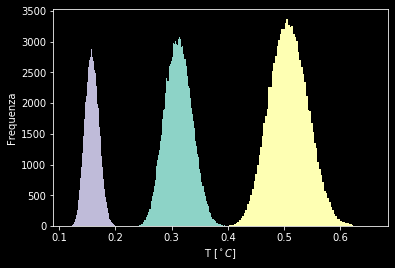

In [18]:
for x in range(0,3):
    Tsa = Ta[x] + 0.2*(rand(100000)-0.5)
    Tse = Teq[x] + 0.2*(rand(100000)-0.5)
    Tsm = Tm[x] + 0.2*(rand(100000)-0.5)
    Msa = Ma[x] + 0.2*(rand(100000)-0.5)
    Mse = Meq + 10.*(randn(100000)-0.5)
    Msm = Mm[x] + 0.2*(rand(100000)-0.5)
    R = (Tsa - Tse)/(Tse-Tsm)
    Mtot = Mse + Msa
    csm = Mtot*R/Msm
    print("sigma [%.2f]" % (stdev(csm)))
    hist(csm, bins=100);
    xlabel("T [$^\circ C$]")
    ylabel("Frequenza")

### Conclusioni 
Riportiamo in una tabella i calori specifici stimati con l'incertezza, nelle due unità di misura $\frac{cal}{g^\circ C}$ e $\frac{J}{kgK}$, con il valore dell'incertezza relativa definita come $\frac{J}{kgK}$

|Materiali |Calore specifico $\pm$ incertezza $[\frac{cal}{g^\circ C}]$|Calore specifico $\pm$ incertezza  $[\frac{J}{kgK}]$| Errore relativo $\frac{\delta x}{x}$ |
|---------:|:-------------------------------------------:|:-------------------------------:|:---------|
|Parallelepipedo| $0.32\pm0.02$ |$1.33 \pm 0.08$| $7 \%$ |
|Pietra| $0.52 \pm 0.03$ |$2.17 \pm 0.13$|$5 \%$|
|Cilindro| $0.16 \pm 0.01$ |$0.66 \pm 0.04$|$7 \%$| 

In base a considerazione qualitative, prima delle misure stesse avevamo supposto che il materiale del parallelepipedo fosse l'alluminio, mentre per quello del cilindro l'ottone. Per il secodno corpo, abbiamo consideraro che si trattasse di un blocco di pietra. Nella seguente tabella sono riportati i calori specifici di questi materiali. Per la pietra riportiamo una media dei calori specifici delle varie tipologie di pietre \(non essendo in grado di riconoscerne una come quella costituente il solido utilizzato in laboratorio\): 

|Materiali | Calori specifici reali $[\frac{cal}{g^\circ C}]$|  
|---------:|:-----------------------------------------------:|
|Alluminio | $0.215$ |
|Pietra    | $0.210$ |
|Ottone    | $0.09$ |

Confrontando questi valori con quelli misurati in laboratorio, notiamo che le misure, per quanto abbastanza precise \(nel senso che l'incertezza relativa è abbastanza piccola \), non sono molto accurate, ma risultano, più o meno significativamente, sovrastimate. Riteniamo che la causa di questi risultati sia l'effetto di errori sistematici di cui sono affette le misure a causa della procedura scelta: infatti, consideriamo come fattori che possono costituire una fonte di errore:
1. Scambi di calore  tra il solido e l'ambiente nel momento in cui questo viene portato fuori dal calorimetro in cui era stato inizialmente inserito;  
2. Scambi di calore tra il calorimetro e l'ambiente nel momento in cui viene tolto il tappo per immergere il solido all'interno;
3. Scambi di calore tra il calorimetro e l'ambiente anche a calorimetro chiuso ( ovvero, non perfetta adiabadicità del calorimetro);
4. Taratura degli strumenti.

Quella che proponiamo di seguito è una procedura alternativa che permetterebbe di ridurre, almeno, gli effetti dovuti agli errori \(1\) e \(2\):

- Si immerge il materiale nel calorimetro riempito con acqua calda a temperatura  $𝑇_{1}$;  
- Si versa dell'acqua fredda, a temperatura  $𝑇_{2}$ attraverso uno dei buchi presenti sul coperchio del caloriemtro, mediante l'uso di un imbuto;
- Si smette di versare acqua quando la temperatura raggiunta dal bagno è una temperatura intermedia tra  $𝑇_{1}$;
Ancora meglio sarebbe utilizzare per la massa di acqua da versare nel calorimetro delle mescolenze, un recipiente con un migliore isolamento termico. 

## 1.3 Calcolo del calore latente di fusione del ghiaccio
### Relazione di base
Come spiegato per l'esperimento 1.2. 

### Procedimento di misura
....

### Dati

In [24]:
Ma = 200.5
DMa = 0.1/np.sqrt(12)
Mg = 70.7
DMg = 0.1/np.sqrt(12)
Ta = 40.
DTa = 0.2/np.sqrt(12)
Teq= 13.4
DTeq = 0.2/np.sqrt(12)
Tf= 0

#### Calcolo

In [25]:
L = ((Meq+Ma)*ca*(Ta-Teq)-ca*Mg*(Teq-Tf))/Mg
DL_Meq = ca*(Ta-Teq)/Mg
DL_Ma = ca*(Ta-Teq)/Mg
DL_Ta = ca*(Meq+Ma)/Mg
DL_Teq = - ca*(Meq + Ma + Mg)/Mg
DL_Mg = -((Meq+Ma)*ca*(Ta-Teq))/Mg**2
DL = np.sqrt(DL_Meq**2*DMeq**2+DL_Ma**2*DMa**2+DL_Ta**2*DTa**2+DL_Teq**2*DTeq**2+DL_Mg**2*DMg**2)
print("Lambda = %.1f cal/g" %(L))
print("Incertezza = %.1f cal/g" %(DL))

Lambda = 73.2 cal/g
Incertezza = 1.9 cal/g


### Incertezze con il metodo 2

sigma [3.76]


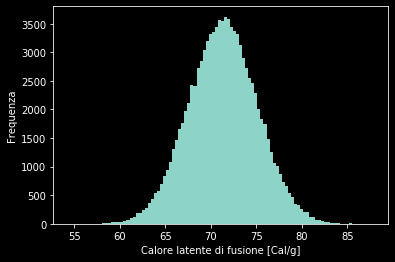

In [26]:
Msa = Ma + 0.2*(rand(100000)-0.5)
Msg = Mg + 0.2*(rand(100000)-0.5)
Tsa = Ta + 0.2*(rand(100000)-0.5)
Tse = Teq + 0.2*(rand(100000)-0.5)
Mse = Meq + 10.*(randn(100000)-0.5)
L = ((Mse+Msa)*ca*(Tsa-Tse)-ca*Msg*(Tse-Tf))/Msg
hist(L, bins=100);
xlabel("Calore latente di fusione [Cal/g]")
ylabel("Frequenza")
print("sigma [%.2f]" % (stdev(L)))

### Concluzione
Migliorare la stima: bisognerebb tenere conto che la temperatura da cui parte il ghiaccio non è 0 ma:
secondo spiegazine professore minore perchè sta nel polistirolo
secondo i dati, maggiore (forse perche nel trasportarla fuori dal polistirolo e pesarla c'è stato qualche scambio di calore. 

## 1.4 Verifica dell'equivalente in acqua del calorimetro
### Relazione di base
Negli esperimenti precedenti per calolare il calore specifico dei tre materiali \(esperimento 1.2\) e il calore latente di fusione del ghiaccio, per una stima più corretta si è tenuto conto del fatto che il sistema termodinamico costituito dall'oggetto \(oppure dal ghiaccio\) e l'acqua non sono gli unici a scambiare calore; il calorimetro stesso, \(o meglio una sua frazione\) infatti, partecipa a questi scambi termici, ed è dunque necessario considerare anche la capacità termica del calorimetro $C_{cal}$. Per questo motivo, la formula corretta per il calcolo del calore specifico di un materiale con capacità termica $C_{m}$ e temperatura $T_{m}$, che immerso in un bagno di acqua a temperatura $T_{a}$ raggiunge una temperatura di equilibrio $T_{e}$, è data da $$ (C_{cal} + C_{a})(T_{a}-T_{e}) = C_{m}(T_{e} - T_{m})$$ Invece di considerare la capacità termica $C_{cal}$, moltiplicando e dividendo il primo membro per il calore specifico dell'acqua $c_{a}$ il risultato dell'operazione $\frac{C_{cal}}{c_{a}}$ è una grandezza che ha le dimensioni di una massa, che chiamiamo massa equivalente $M^*$. Tale massa rappresenta la massa di acqua che ha la stessa capacità termica di quella parte di calorimetro che partecipa agli scambi termici. Si arriva dunque alla formula utilizzata nell'esperimeto 1.2 $$ (M^*+ M_{a})c_{a}(T_{a}-T_{e}) = M_{m}c_{m}(T_{e} - T_{m})$$
Una possibile strategia per misurare il termine $M^*$ è versare all'interno del calorimetro un materiale il cui calore specifico sia noto, come, per esempio, una massa di acqua $M_{2}$ a temperatura $T_{2}$; chiamando $M_{1}$ la massa dell'acqua contenuta nel calorimetro con temperatura T_{1}, si ottiene la formula che corrisponde a quella da noi utilizzata nel codice ...seguente... $$ (M^*+ M_{1})c_{a}(T_{1}-T_{e}) = M_{2}c_{m}(T_{e} - T_{2})$$

### Procedimento di misura
- Si riempie il calorimetro delle mescolanze con una massa $M_1$ di acqua a temperatura $T_{1}$; 
- Si prepara in un contenitore (nel nostro caso, il secondo calorimetro), una massa di acqua $M_{2}$ a temperatura $T_{2}$;
- Si versa l'acqua a temperatura $T_{2}$ nel calorimetro delle mescolanze e si registra la temperatura di equilibrio $T_{e}$ che viene raggiunta dal sistema.
### Dati
`Ma1` massa acqua nel calorimetro delle mescolanze \($g$\);  
`DM_Ma1` incertezza massa acqua nel calorimetro delle mescolande \($g$\);    
`Ma2` massa acqua nel secondo calorimetro \($g$\);  
`DMa2` incertezza massa acqua nel secondo calorimetro \($g$\);  
`Ta1` Temperatura dell'acqua nel primo calorimetro \($^\circ C$ \);  
`DTa1` Incertezza temperatura dell'acqua nel primo calorimetro \($^\circ C$ \);  
`Ta2` Temperatura dell'acqua nel secodno calorimetro \($^\circ C$ \);    
`DTa2` Incertezza temperatura dell'acqua nel secondo calorimetro \($^\circ C$ \);    
`Teq` Temperatura dell'acqua all'equilibrio \($^\circ C$ \);  
`DTa2` Incertezza temperatura dell'acqua all'equilibrio \($^\circ C$ \);  

In [22]:
Ma1 = 201.2
DMa1= 0.1/np.sqrt(12)
Ma2 = 31.2
DMa2= 0.1/np.sqrt(12)
Ta1 = 40.4
DTa1= 0.2/np.sqrt(12)
Ta2 = 23.6
DTa2= 0.2/np.sqrt(12)
Teq = 38.4
DTeq= 0.2/np.sqrt(12)

#### Calcoli 

In [23]:
Meq = Ma2*(Teq - Ta2)/(Ta1 - Teq) - Ma1
DM_Ma1 = -1
DM_Ma2 = (Teq - Ta2)/(Ta1 - Teq)
DM_Ta1 = -Ma2*(Teq - Ta2)/(Ta1 - Teq)**2
DM_Ta2 = -Ma2/(Ta1 - Teq)
DM_Teq =  Ma2/(Ta1 - Teq)
DM = np.sqrt(DM_Teq**2*DTeq**2+DM_Ma1**2*DMa1**2+DM_Ta1**2*DTa1**2+DM_Ta2**2*DTa2**2+DM_Ma2**2*DMa2**2)
print(Meq)
print(DM)

29.67999999999995
6.788974787599866


Possibile spiegazione: siccome la massa equivalente è definita coma la massa di acqua che ha la stessa capacità termica di quella parte di calorimetro che partecipa agli scambi, se la massa mi viene negativa potrebbe volere dire che, per i valori inseriti, la massa di calorimetro che partecipa agli scambi è praticamente inconsistente, cioè ci sta una soglia minima di volume che deve essere riempito affinchè il calorimetro partecipi agli scambi. 

## Appendice

### Tabella dati esperimento 1

## Video 1, 1s


|Tempo | Temperatura |  
|---------:|:-------:|
|0|28.2|
|1|--|
|2|34.2|
|3|36.2|
|4|38|
|5|39.6|
|6|41|
|7|42.2|
|8|43.4|
|9|44.4|
|10|45.4|
|11|46.2|
|12|47|
|13|47.6|
|14|48.2|
|15|48.8|
|16|49.4|
|17|49.8|
|18|50.2|
|19|50.6|
|20|51|
|21|51.2|
|22|51.6|
|23|51.8|
|24|52.2|
|25|52.4|
|26|52.6|
|27|52.6|
|28|52.8|
|29|53|
|30|53|
|31|53.2|
|32|53.4|
|33|53.4|
|34|53.6|
|35|53.6|
|36|53.6|
|37|53.8|
|38|53.8|
|39|53.8|
|40|54|
|41|54|
|42|54|
|43|54|
|44|54|
|45|54.2|
|46|54.2|
|47|54.2|
|48|54.2|
|49|54.2|
|50|54.4|
|51|54.4|
|52|54.4|

## Video 2 , 1s


|Tempo | Temperatura |  
|---------:|:------------:|
|0|28.2|
|1|30.8|
|2|32.8|
|3|35.2|
|4|37.6|
|5|39.2|
|6|40.6|
|7|41.8|
|8|43|
|9|44|
|10|45|
|11|46|
|12|46.6|
|13|47.4|
|14|48|
|15|48.6|
|16|49.2|
|17|49.6|
|18|50|
|19|50.4|
|20|50.6|
|21|51|
|22|51.2|
|23|51.6|
|24|51.8|
|25|52|
|26|52|
|27|52.2|
|28|52.4|
|29|52.6|
|30|52.8|
|31|52.8|
|32|53|
|33|53|
|34|53.2|
|35|53.2|
|36|53.4|
|37|53.4|
|38|53.4|
|39|53.6|
|40|53.6|
|41|53.6|
|42|53.6|
|43|53.8|
|44|53.8|
|45|53.8|
|46|53.8|
|47|53.8|
|48|54|
|49|54|
|50|54|
|51|54|
|52|54|
|53|54|
|54|54|
|55|54|
|56|54|
|57|54.2|
|58|54.2|
|59|54.2|
|60|54.2|
|61|54.2|
|62|54.2|
|63|54.2|
|64|54.2|
|65|54.2|
|66|54.4|